
**Task-1**

Intermediate level-02
## Exploratory Data Analysis on Dataset- Terrorism

In [ ]:
#let us import libraries which we are going to use.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Downloading the dataset:-

In [ ]:
terror_df = pd.read_csv('/content/drive/MyDrive/Colab/globalterror.csv', encoding = "ISO-8859-1")
terror_df.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

Exploratory Data Analysis:-

In [ ]:
terror_df.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

In [ ]:
terror_df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
# Renaming some columns which we are gonna use.
terror_df.rename(columns={'iyear':'Year', 'imonth' : 'Month', 'iday' :'Day' ,'country_txt': 'Country', 'provstate' : 'State', 'region_txt':'Region', 'attacktype1_txt' : 'AttackType', 'target1':'Target', 'nkill':'Killed', 'nwound': 'Wounded' , 'summary':'Summary','gname':'Group', 'targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type', 'motive':'Motive' }, inplace=True)

In [ ]:
terror_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# We didn't require all the columns so we will choose which need  
terror_df = terror_df[['Year','Month','Day','Country','State','Region','city','latitude',
 'longitude','AttackType','Target','Killed','Wounded','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df.head()

Year  Month  Day  ...                  Target_type Weapon_type Motive
0  1970      7    2  ...  Private Citizens & Property     Unknown    NaN
1  1970      0    0  ...      Government (Diplomatic)     Unknown    NaN
2  1970      1    0  ...          Journalists & Media     Unknown    NaN
3  1970      1    0  ...      Government (Diplomatic)  Explosives    NaN
4  1970      1    0  ...      Government (Diplomatic)  Incendiary    NaN

[5 rows x 18 columns]

In [ ]:
terror_df.shape

(181691, 18)

In [ ]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Target       181055 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
terror_df.describe(include='all')

Year          Month  ...  Weapon_type   Motive
count   181691.000000  181691.000000  ...       181691    50561
unique            NaN            NaN  ...           12    14490
top               NaN            NaN  ...   Explosives  Unknown
freq              NaN            NaN  ...        92426    14889
mean      2002.638997       6.467277  ...          NaN      NaN
std         13.259430       3.388303  ...          NaN      NaN
min       1970.000000       0.000000  ...          NaN      NaN
25%       1991.000000       4.000000  ...          NaN      NaN
50%       2009.000000       6.000000  ...          NaN      NaN
75%       2014.000000       9.000000  ...          NaN      NaN
max       2017.000000      12.000000  ...          NaN      NaN

[11 rows x 18 columns]

Visualization 

In [ ]:
print('Country with most attacks: ',terror_df['Country'].value_counts().idxmax())
print('City with most attacks: ',terror_df['city'].value_counts().index[1])
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
terror_df.Year.value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [ ]:
fig = px.histogram(terror_df, x='Year', marginal='box', nbins=47, title='Distribution of most Terror attack over the year')
fig.update_layout(bargap=0.8)
fig.show()

In [ ]:
terror_df.Country.nunique()

205

In [ ]:
#Countries with most terror attack
top_countries = terror_df.Country.value_counts().head(20)
top_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

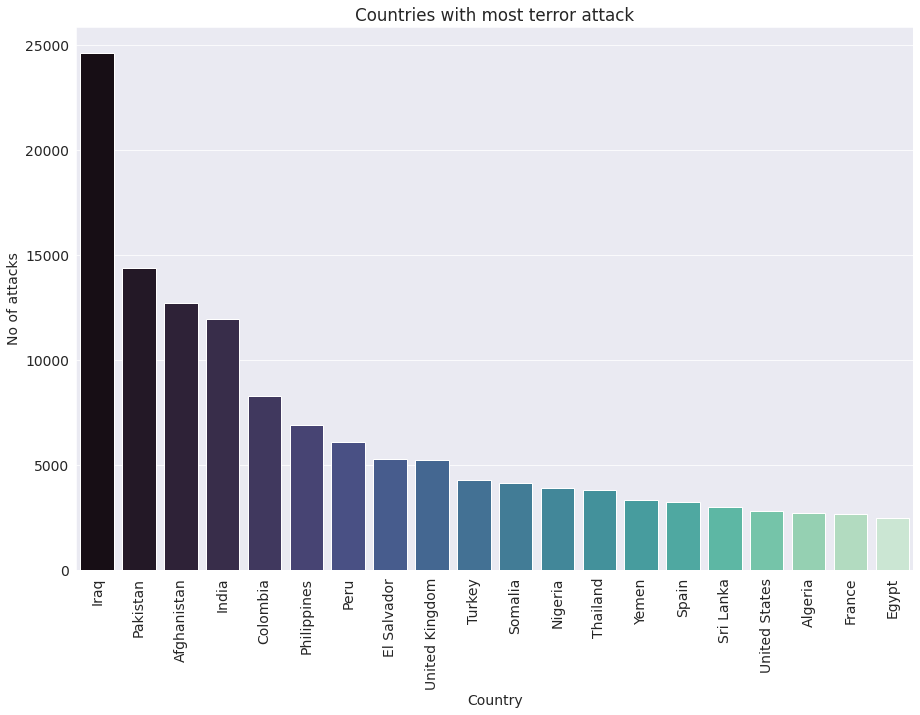

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=top_countries.index, y=top_countries,palette="mako")
plt.xlabel('Country')
plt.ylabel("No of attacks")
plt.title("Countries with most terror attack");

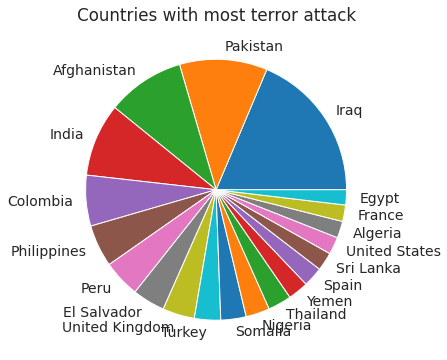

In [ ]:
plt.pie(top_countries, labels=top_countries.index)
plt.title("Countries with most terror attack")
plt.show()

In [ ]:
# Top states with most attack
top_State = terror_df.State.value_counts().head(20)
top_State

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

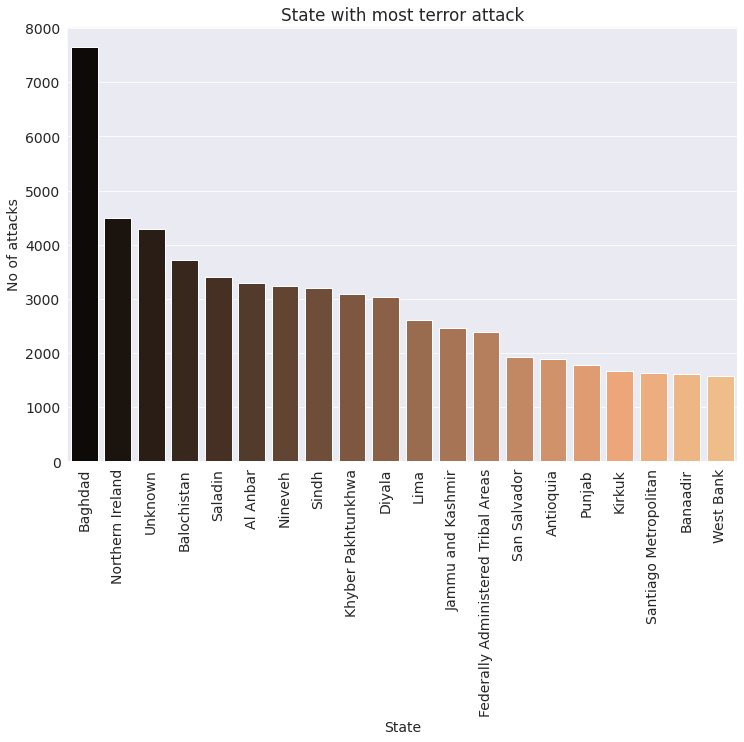

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=top_State.index, y=top_State,palette="copper")
plt.xlabel('State')
plt.ylabel("No of attacks")
plt.title("State with most terror attack");

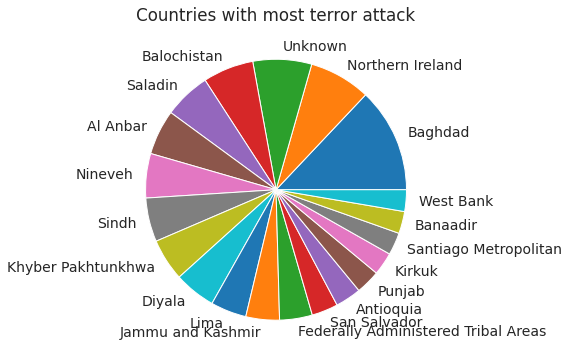

In [ ]:
plt.pie(top_State, labels=top_State.index)
plt.title("Countries with most terror attack")
plt.show()

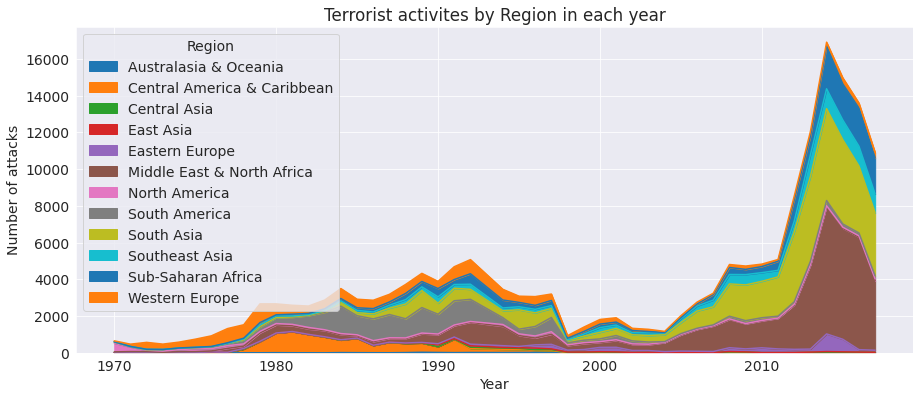

In [ ]:
#Area plot
pd.crosstab(terror_df.Year,terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

In [ ]:
area_with_terror_activity = terror_df.Region.value_counts()
area_with_terror_activity

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [ ]:
area_with_terror_activity.describe()

count       12.000000
mean     15140.916667
std      16696.919414
min        282.000000
25%       2792.500000
50%      11414.500000
75%      17907.000000
max      50474.000000
Name: Region, dtype: float64

In [ ]:
fig = px.histogram(terror_df, x='Region',color='Region', nbins=100, title='Terrorist activites by Region in each year')
fig.update_layout(bargap=0.8)
fig.show()

In [ ]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_df['casualities'] = terror_df['Killed'] + terror_df['Wounded']

In [ ]:
terror_new = terror_df.sort_values(by='casualities',ascending=False)[:30]

In [ ]:
terror_new.corr()

Year     Month       Day  ...    Killed   Wounded  casualities
Year         1.000000 -0.032080 -0.169634  ...  0.132656 -0.249850    -0.203149
Month       -0.032080  1.000000 -0.270759  ...  0.105265  0.101020     0.112755
Day         -0.169634 -0.270759  1.000000  ... -0.171906 -0.032207    -0.062604
latitude     0.003728  0.314738 -0.057494  ... -0.017608  0.131062     0.116579
longitude    0.150097 -0.398737  0.198550  ... -0.196272 -0.258780    -0.274700
Killed       0.132656  0.105265 -0.171906  ...  1.000000  0.354211     0.516918
Wounded     -0.249850  0.101020 -0.032207  ...  0.354211  1.000000     0.983632
casualities -0.203149  0.112755 -0.062604  ...  0.516918  0.983632     1.000000

[8 rows x 8 columns]

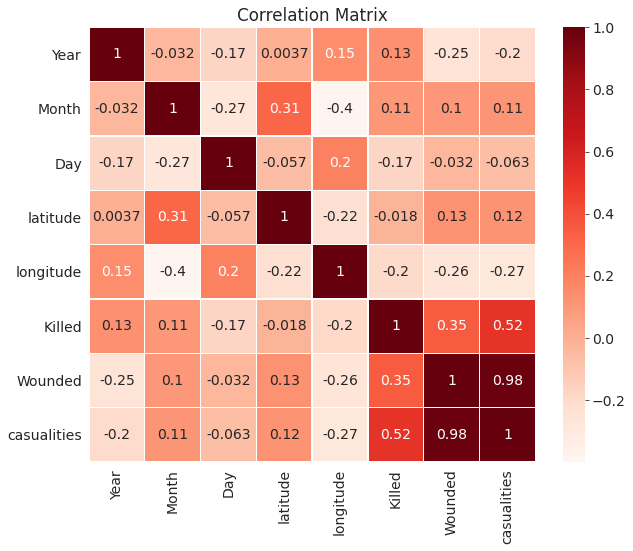

In [ ]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[10,8])
sns.heatmap(terror_new.corr(),cmap='Reds', linewidths=0.4,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
attack_type = terror_df.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

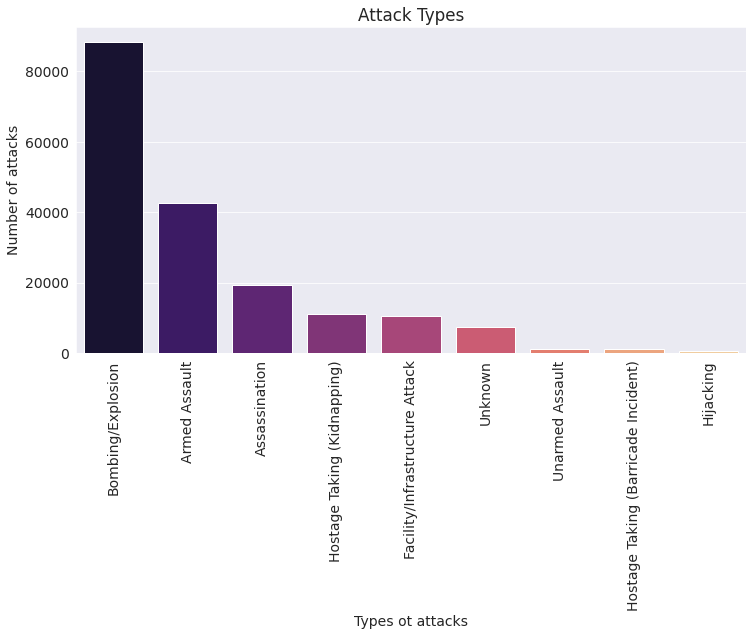

In [ ]:
## Attack types 
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="magma")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
# No of death in each attack type
attack_killed = terror_df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed.sort_values(by='Killed',ascending=False,inplace=True)

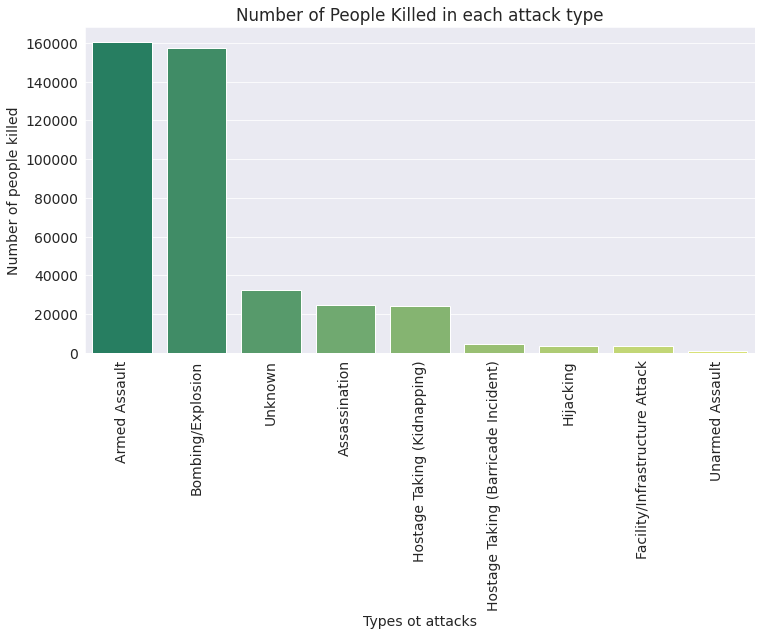

In [ ]:
## No of death in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="summer")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

**Conclusion:-**
1.   Country with most attacks:  Iraq
2.   City with most attacks:  Baghdad
3.   Region with the most attacks: Middle East & North Africa
4.   Year with the most attacks: 2014
5.   Group with the most attacks: Taliban
6.   Most Attack Types: Bombing/Explosion


